<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/day4/Daily_Challenge/Interactive_Data_Visualization_with_Plotly_and_Plotnine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

df = pd.read_excel('/content/US Superstore data.xls')
print(df.head())
print(df.info())
df = df.drop_duplicates()
df = df.dropna(subset=['Sales', 'Profit', 'Discount', 'Country'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
print(df.describe())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [20]:
import plotly.express as px

df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
fig_line = px.line(sales_by_year, x='Year', y='Sales', title='Sales Trends Over the Years', markers=True)
fig_line.update_layout(xaxis_title='Year', yaxis_title='Sales')
fig_line.show()


In [21]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()
fig_map = px.choropleth(sales_by_country,
                        locations='Country',
                        locationmode='country names',
                        color='Sales',
                        title='Sales Distribution by Country',
                        color_continuous_scale=px.colors.sequential.Plasma)
fig_map.update_layout(geo=dict(showcoastlines=True, coastlinecolor='Black', showland=True, landcolor='white'))
fig_map.show()


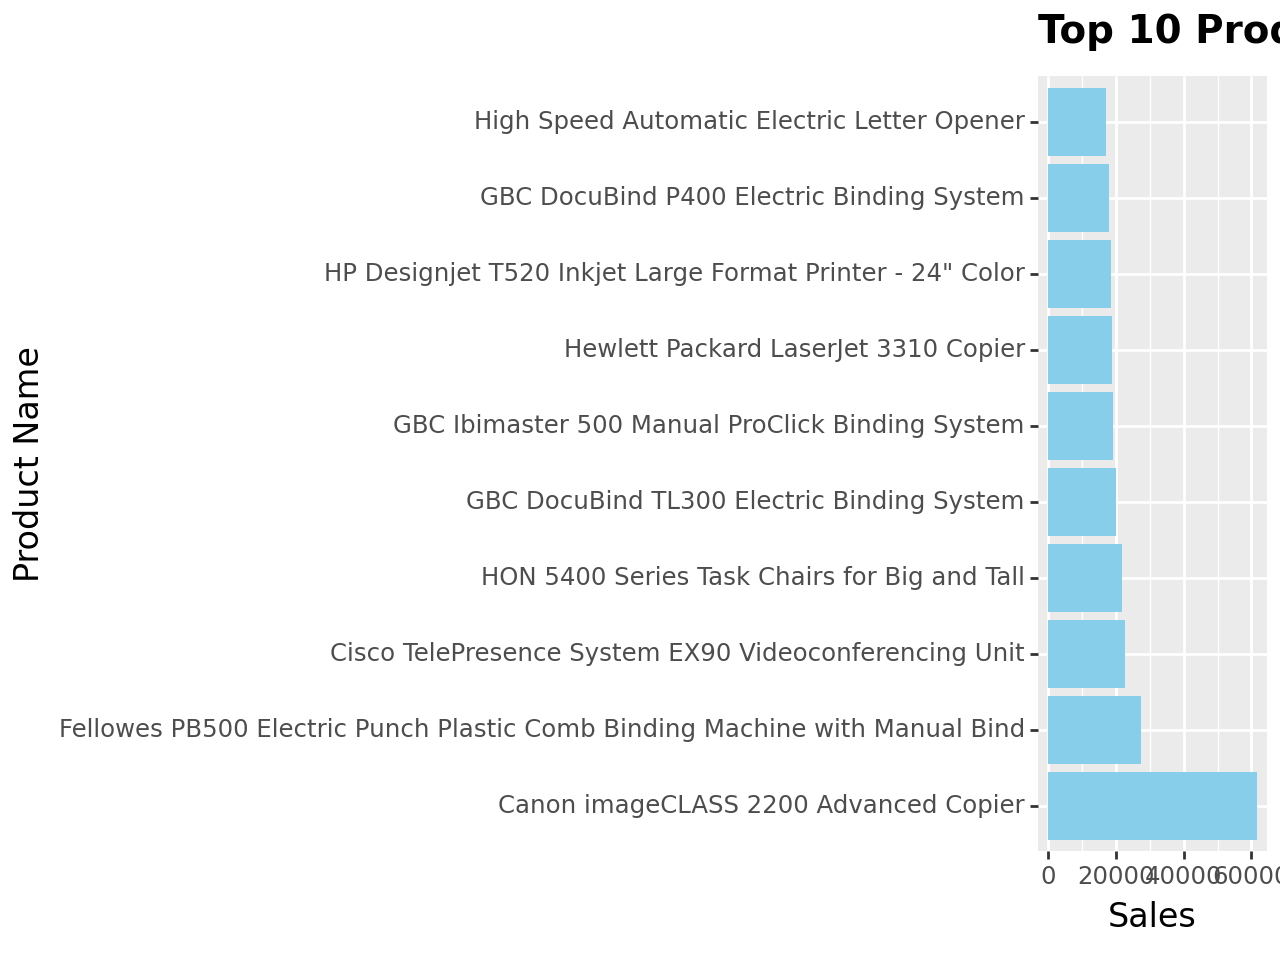

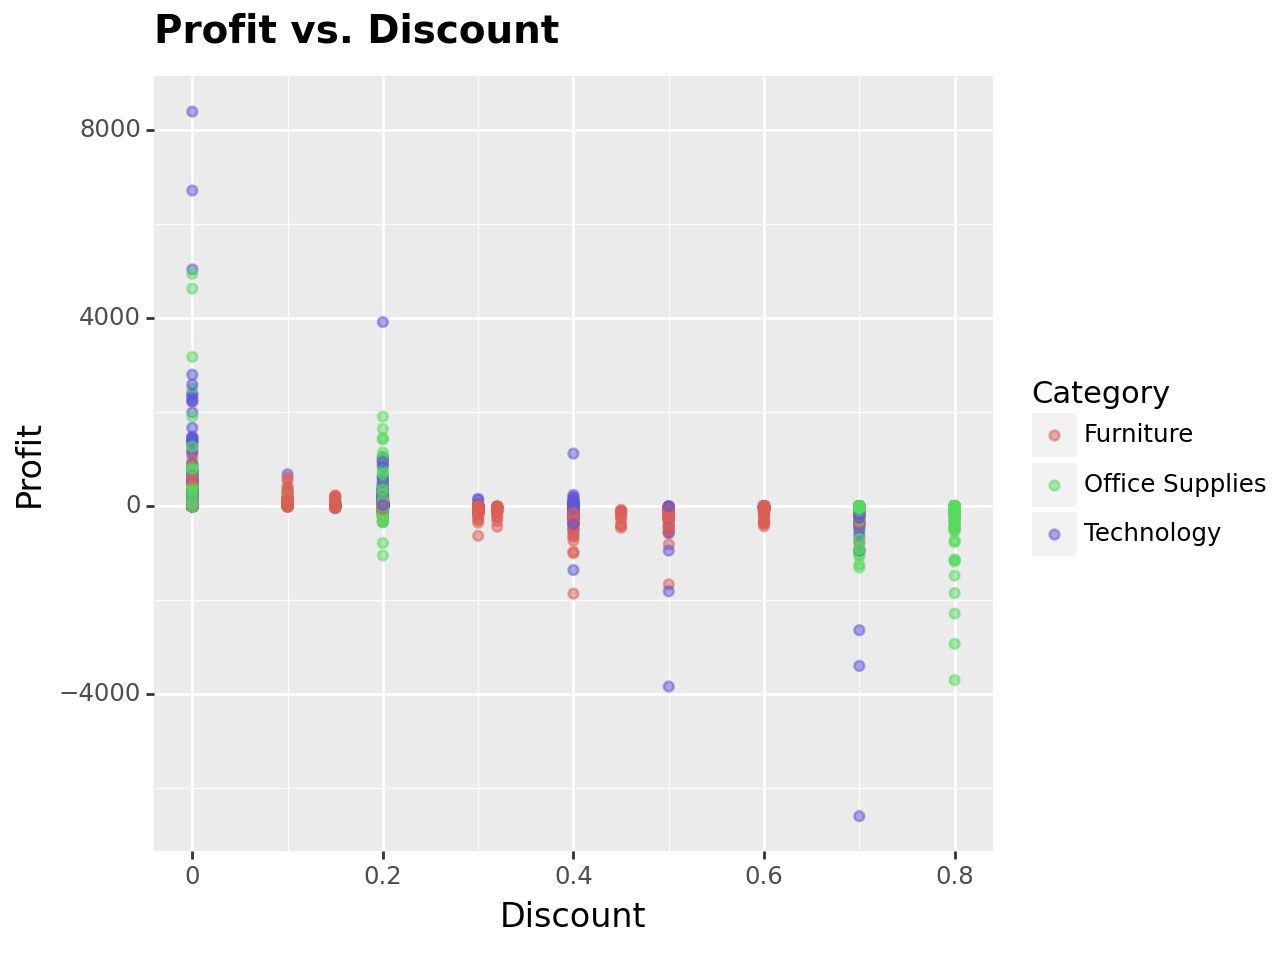

In [26]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, theme, element_text

sales_by_product = df.groupby('Product Name')['Sales'].sum().reset_index()

top_10_products = sales_by_product.nlargest(10, 'Sales')
top_10_products['Product Name'] = pd.Categorical(top_10_products['Product Name'], categories=top_10_products['Product Name'], ordered=True)

plot_bar = (
    ggplot(top_10_products, aes(x='Product Name', y='Sales')) +
    geom_bar(stat='identity', fill='skyblue') +
    coord_flip() +
    labs(title='Top 10 Products by Sales', x='Product Name', y='Sales') +
    theme(axis_title_x=element_text(size=12), axis_title_y=element_text(size=12), plot_title=element_text(size=14, weight='bold'))
)
print(plot_bar)

plot_scatter = (
    ggplot(df, aes(x='Discount', y='Profit')) +
    geom_point(aes(color='Category'), alpha=0.5) +
    labs(title='Profit vs. Discount', x='Discount', y='Profit') +
    theme(axis_title_x=element_text(size=12), axis_title_y=element_text(size=12), plot_title=element_text(size=14, weight='bold'))
)
print(plot_scatter)

